Here I continue applying different regularization to account for the beam orbit in the ML and also to keep the it at nanometer level at the exit.

In [1]:
import warnings
import pandas as pd
import os
import pickle as pk
import tqdm
import matplotlib.pyplot as plt
import numpy as np

import placetmachine as pl

warnings.simplefilter(action='ignore', category=FutureWarning)

def gather_data2(folder, supress_output = False):
    data = []
    _start, _end = 1489, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [2]:
def gather_data3(folder, supress_output = False):
    data = []
    _start, _end = 0, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [12]:
y2_summary_dict = {
    'iteration': [],
    'n_features': [],
    'score': [],
    'weights': [],
    'features': [],
    'total_loss': [], 
    'zero_loss': [], 
    'orbit_loss': [],
    'exit_orbit_loss': []
}

for i in tqdm.tqdm(range(20)):
    FOLDER = f"data/learning_storage/orbit_supression_2/Y2_sfs1_it{i}"

    tmp = gather_data3(FOLDER, True)
    tmp_sorted = tmp.sort_values(by = ['total_loss'])
    
    y2_summary_dict['iteration'].append(i)
    y2_summary_dict['n_features'].append(len(tmp_sorted.features_ids.values[0]))
    y2_summary_dict['score'].append(tmp_sorted.score.values[0])
    y2_summary_dict['weights'].append(tmp_sorted.weights.values[0])
    y2_summary_dict['features'].append(tmp_sorted.features_ids.values[0])
    y2_summary_dict['total_loss'].append(tmp_sorted.total_loss.values[0]) 
    y2_summary_dict['zero_loss'].append(tmp_sorted.zero_loss.values[0])
    y2_summary_dict['orbit_loss'].append(tmp_sorted.orbit_loss.values[0])
    y2_summary_dict['exit_orbit_loss'].append(tmp_sorted.exit_orbit_loss.values[0])
    
#    print(tmp_sorted.features_ids.values[0])
#    print(tmp_sorted.weights.values[0].ravel())

y2_summary = pd.DataFrame(y2_summary_dict)

y2_summary['problem_loss'] = y2_summary.total_loss - y2_summary.orbit_loss - y2_summary.zero_loss - y2_summary.exit_orbit_loss

print(y2_summary)

100%|██████████| 20/20 [00:03<00:00,  5.76it/s]

    iteration  n_features     score  \
0           0           3  0.416065   
1           1           4  0.523897   
2           2           5  0.551744   
3           3           6  0.588374   
4           4           7  0.593571   
5           5           8  0.734754   
6           6           9  0.792273   
7           7          10  0.793942   
8           8          11  0.802715   
9           9          12  0.844143   
10         10          13  0.929300   
11         11          14  0.944677   
12         12          15  0.964892   
13         13          16  0.968690   
14         14          17  0.975317   
15         15          18  0.979305   
16         16          19  0.988904   
17         17          20  0.990997   
18         18          21  0.993208   
19         19          22  0.994219   

                                              weights  \
0            [[1.0215611], [-16.714703], [1.0582073]]   
1   [[0.99806404], [-15.701691], [1.294293], [-0.4...   
2   [[2.6

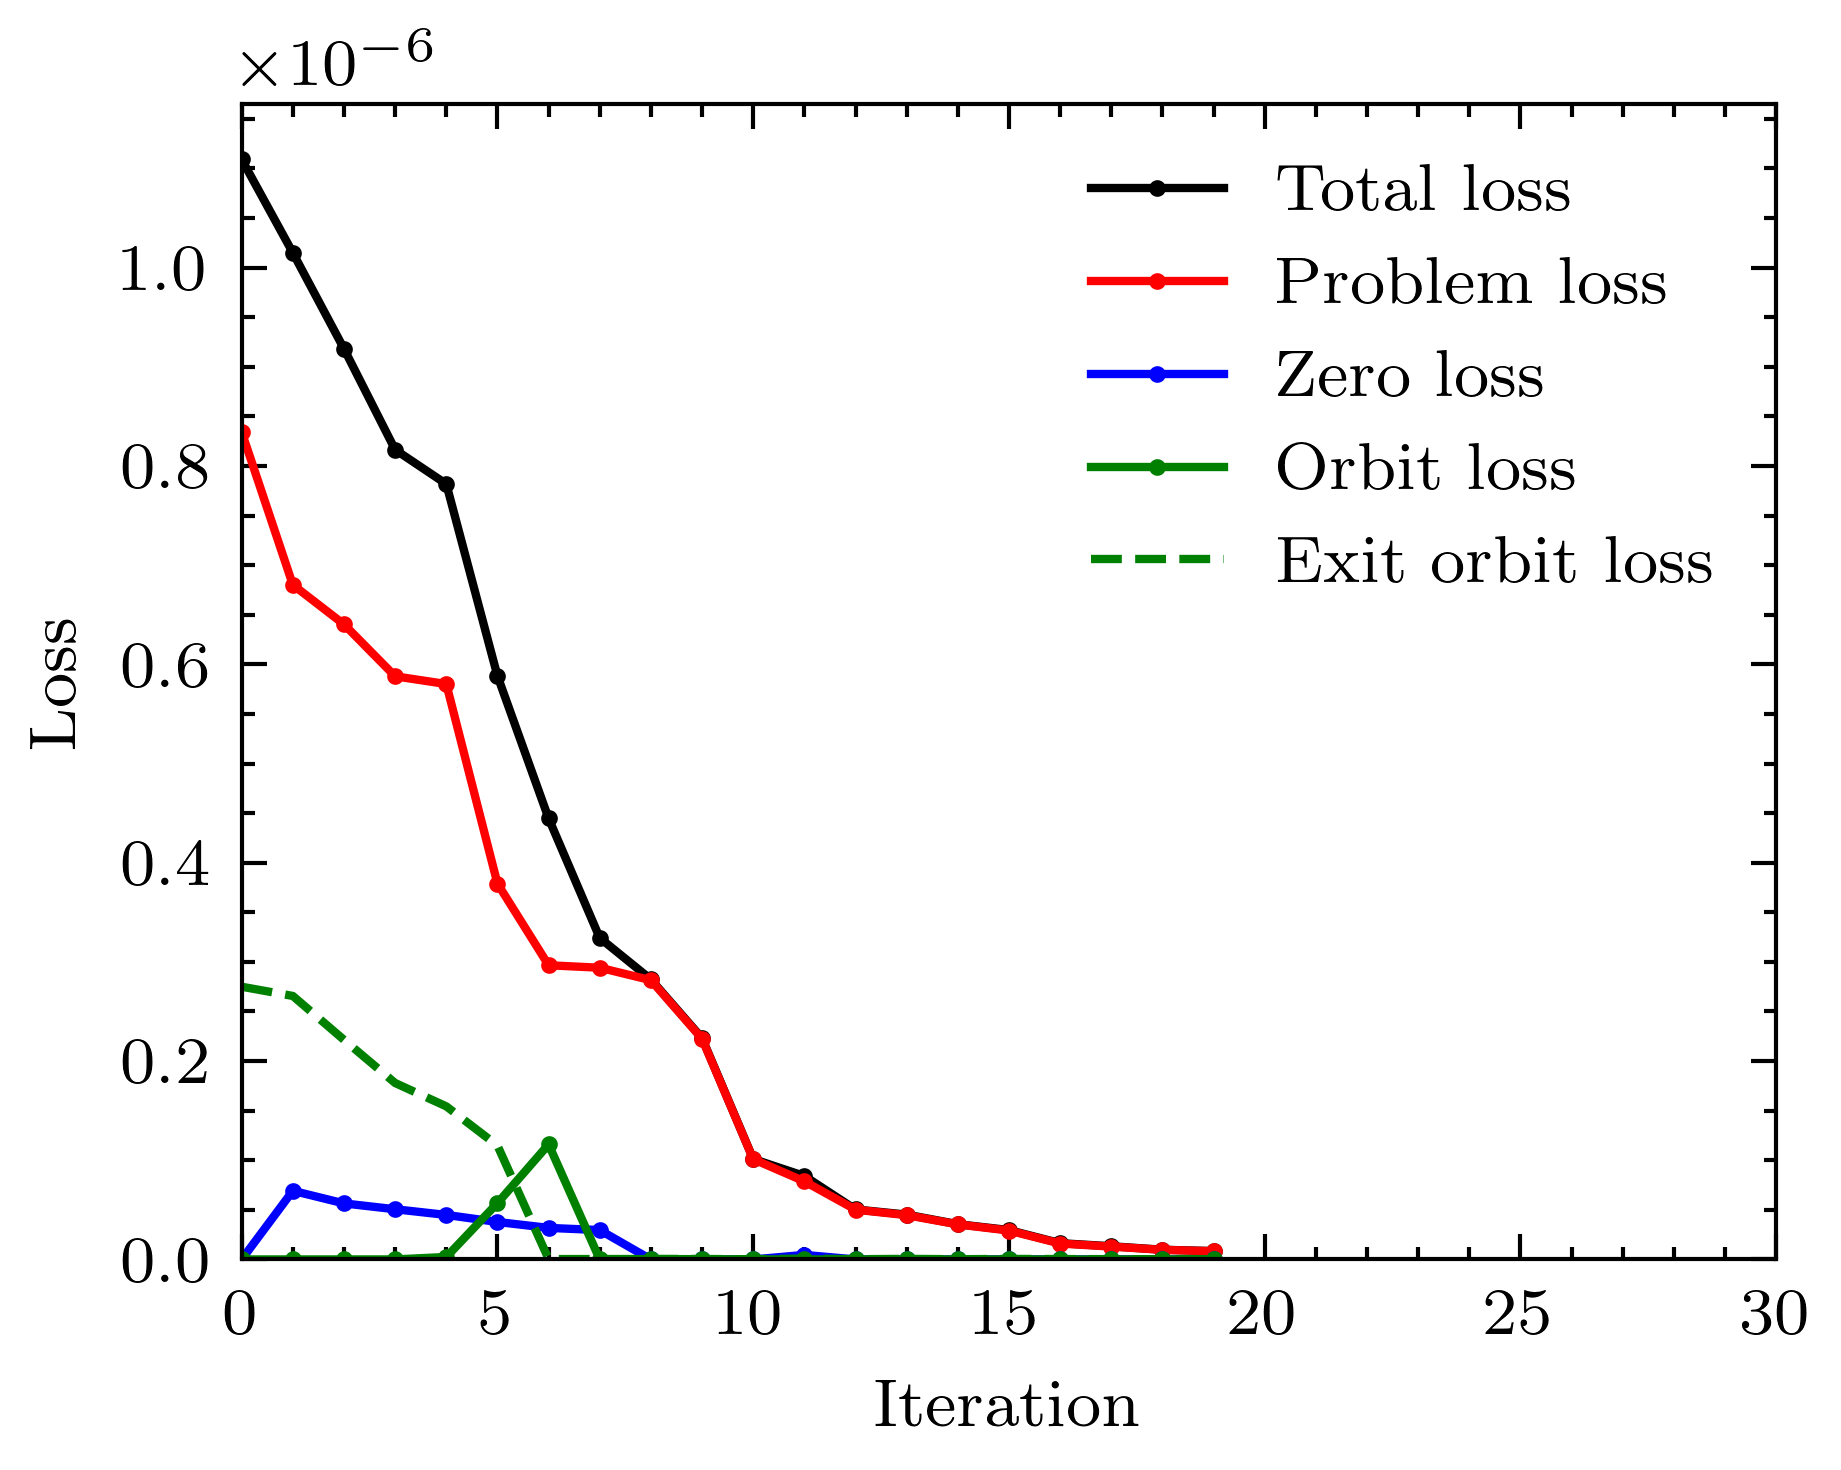

In [13]:
with plt.style.context(['science', 'ieee']):
    plt.plot(y2_summary.iteration, y2_summary.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")
    plt.plot(y2_summary.iteration, y2_summary.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(y2_summary.iteration, y2_summary.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(y2_summary.iteration, y2_summary.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(y2_summary.iteration, y2_summary.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")


    plt.xlim(0, 30)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

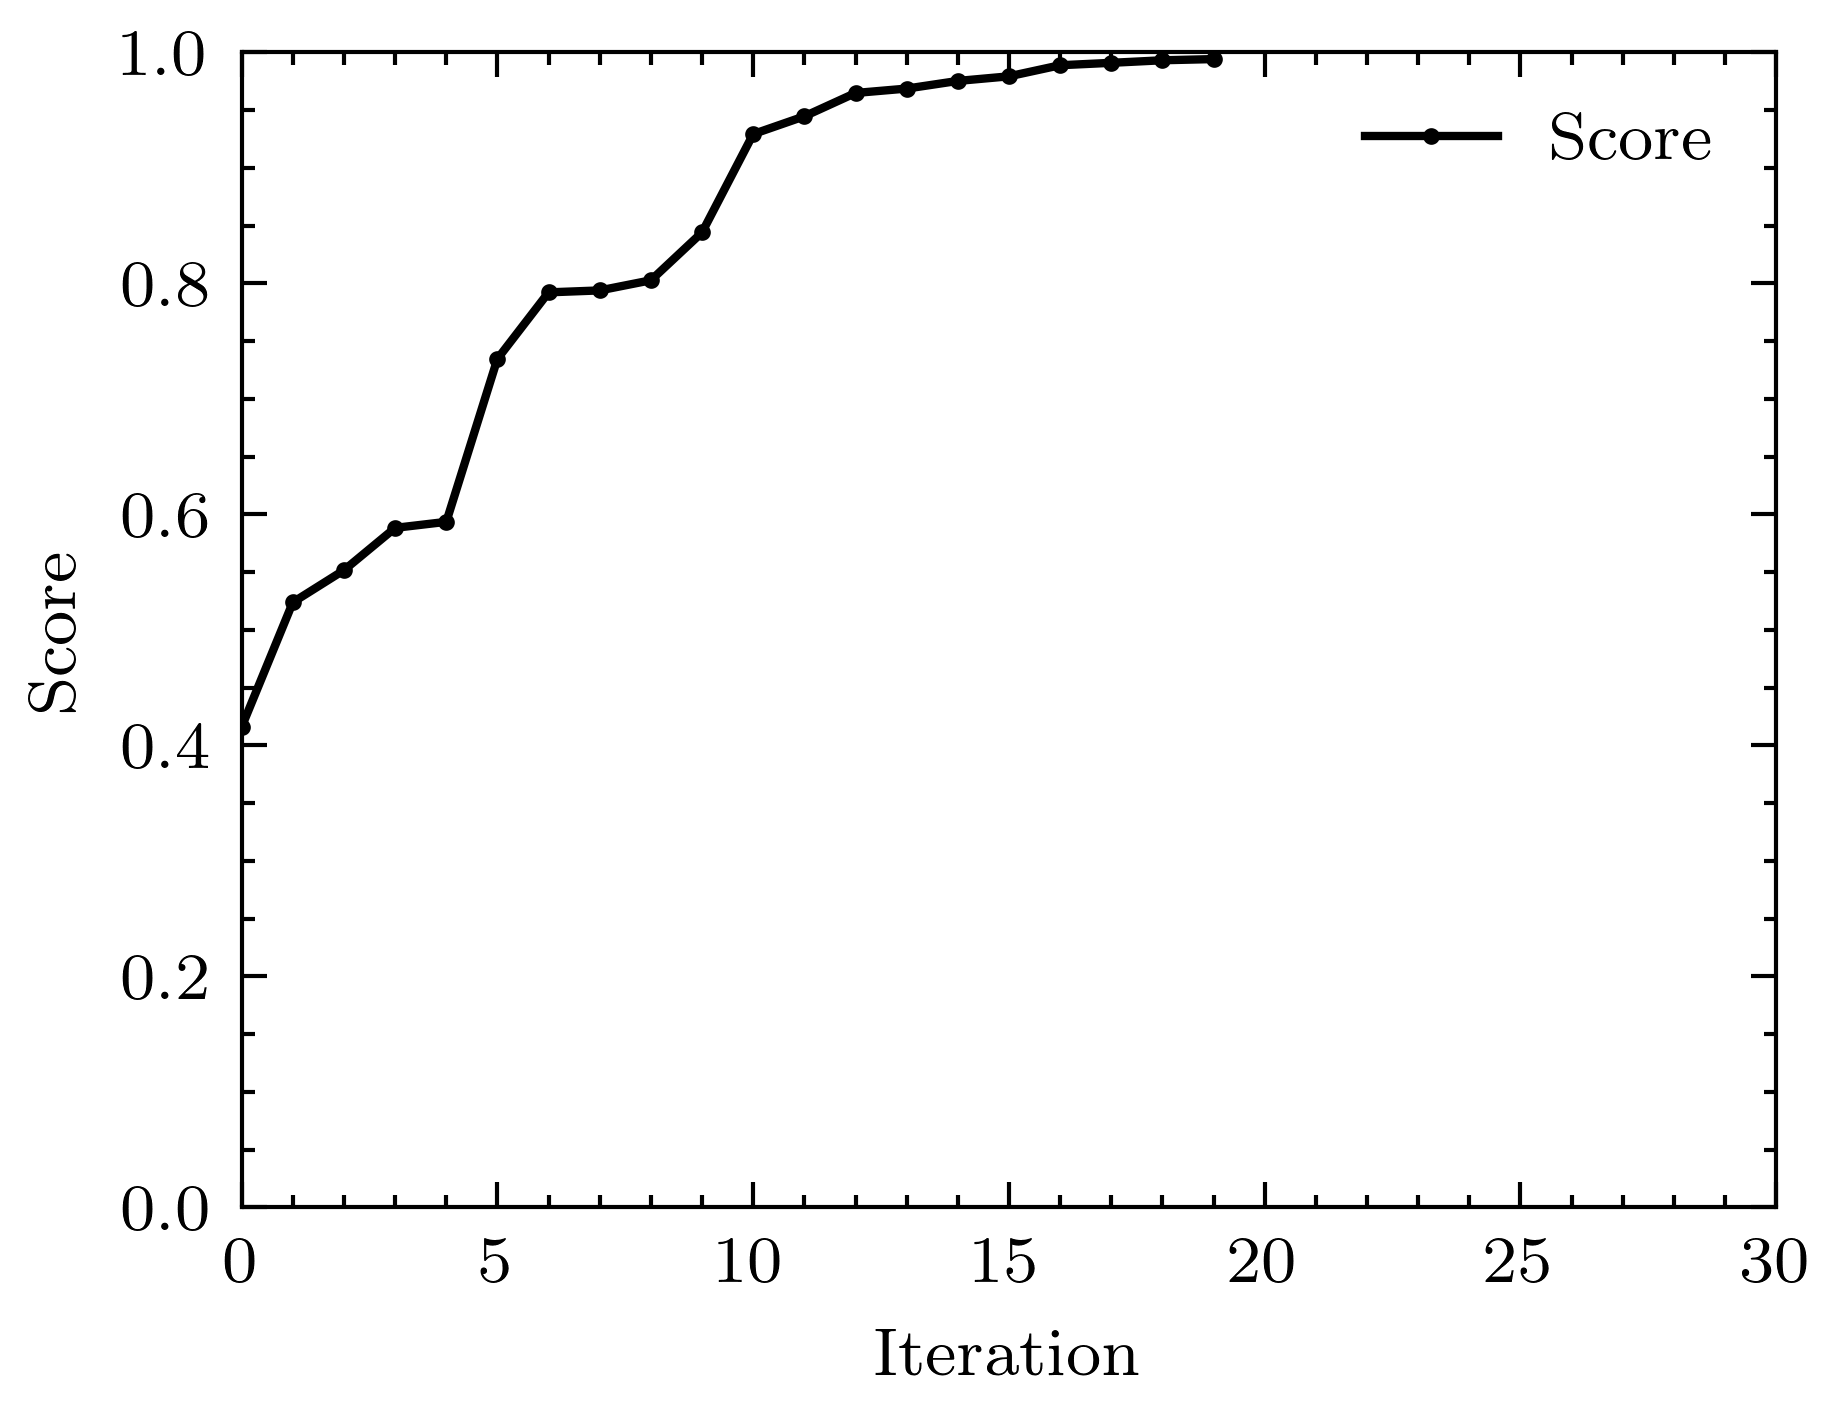

In [15]:
with plt.style.context(['science', 'ieee']):
#    plt.plot(y8_summary.n_features, y8_summary.total_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(y2_summary.iteration, y2_summary.score, '-o', markersize = 1.0, label = "Score", color = "black")
    
    plt.xlim(0, 30)
    plt.ylim(0.0, 1.0)
    
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.show()

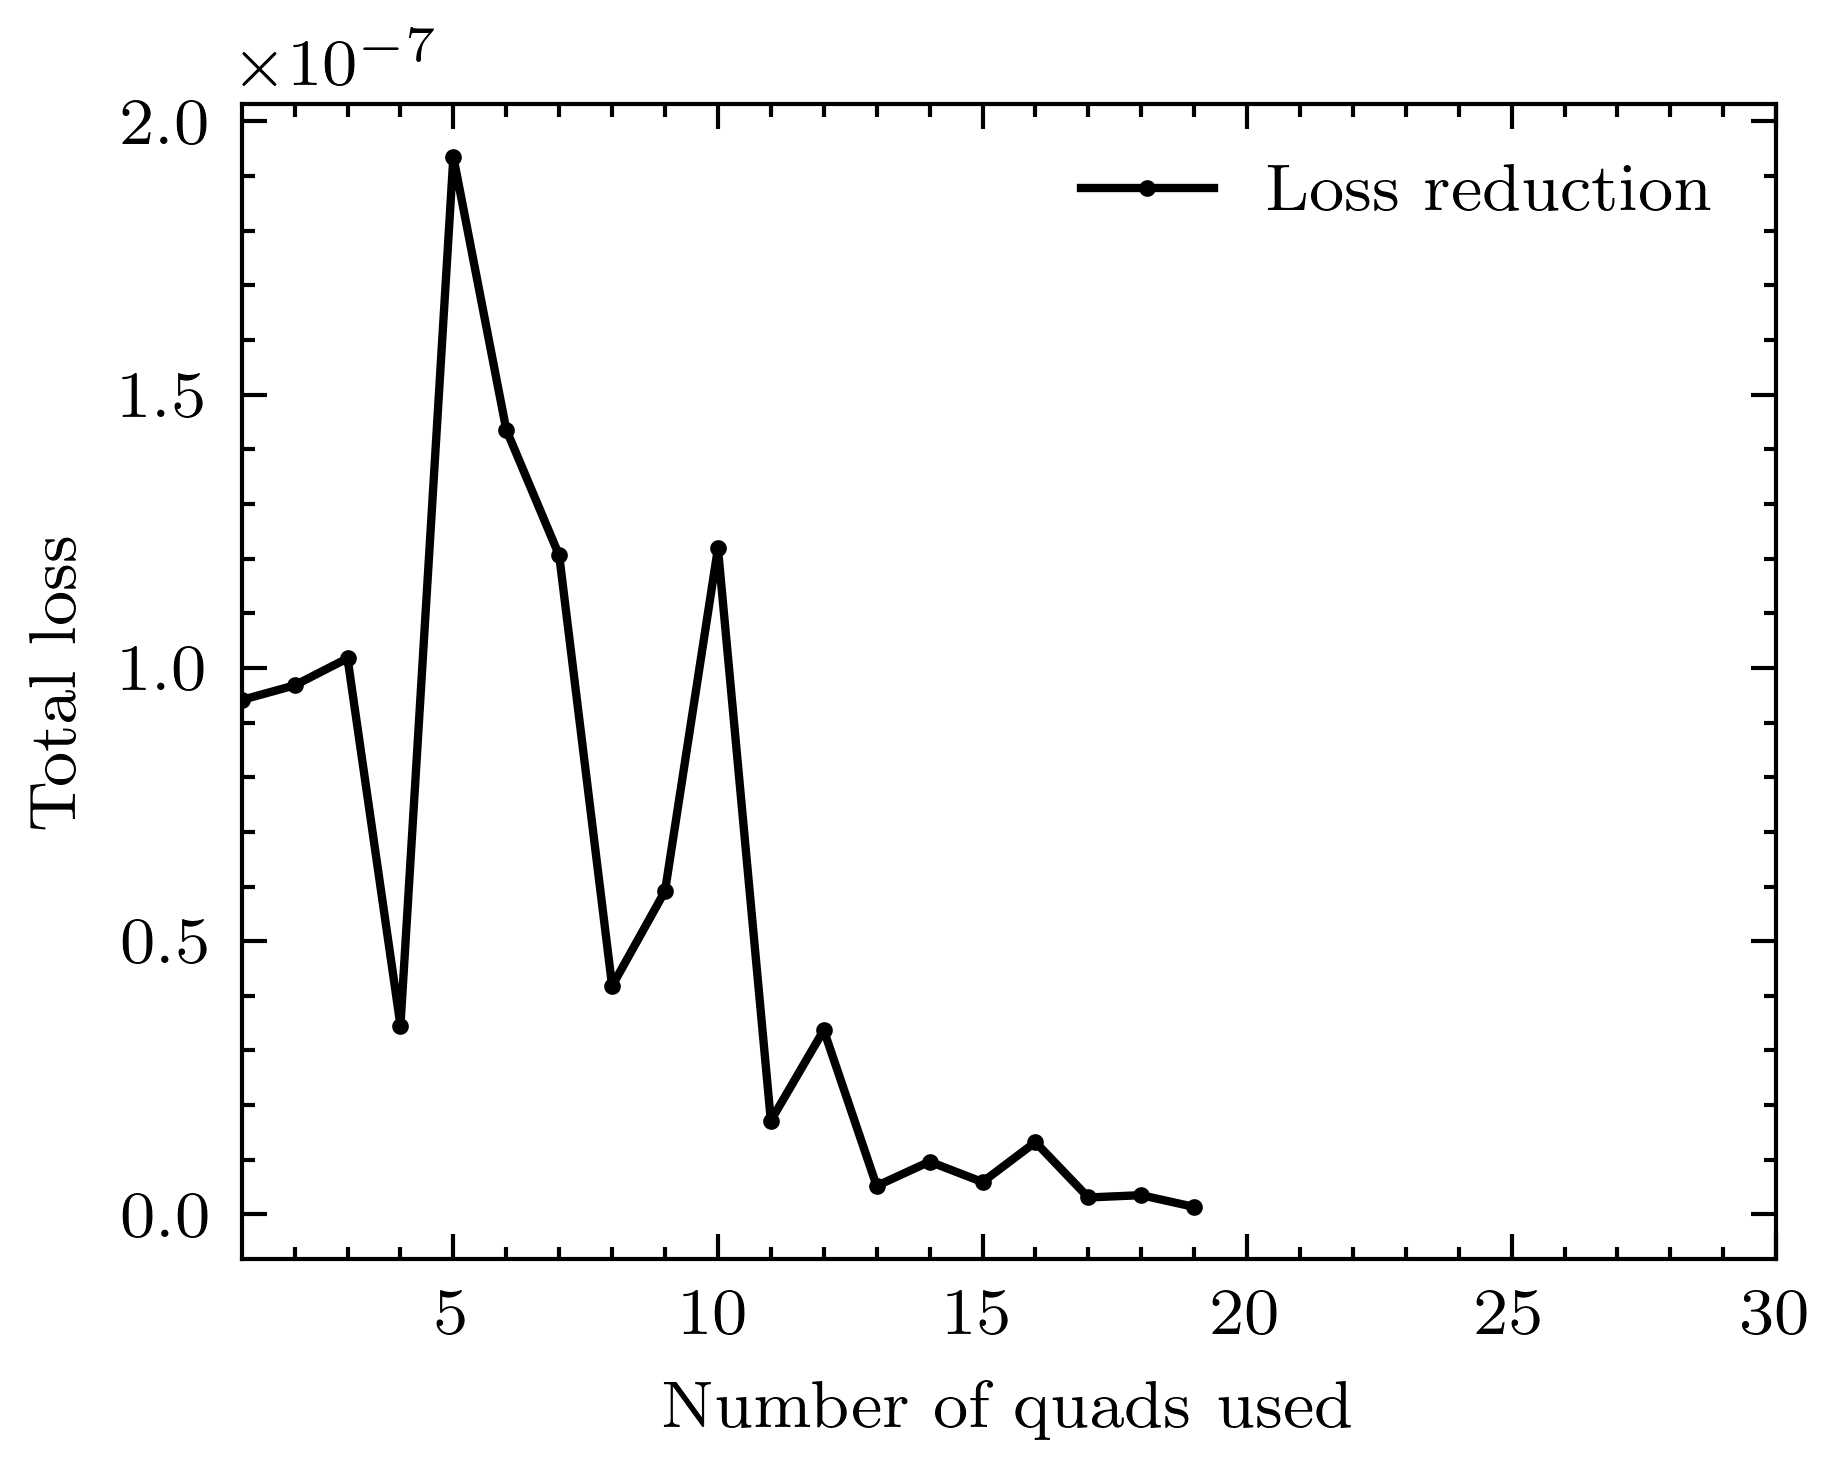

In [16]:
# plotting the dependance of the loss decrese as the function of the number of quads used

loss_reduction = []

for i in range(1, len(y2_summary.total_loss)):
    loss_reduction.append(y2_summary.total_loss[i - 1] - y2_summary.total_loss[i])
    
with plt.style.context(['science', 'ieee']):
    plt.plot(range(1, len(y2_summary.total_loss)), loss_reduction, '-o', markersize = 1.0, label = "Loss reduction", color = "black")

    plt.xlim(1, 30)
#    plt.ylim(0, 1.1e-7)
    
    plt.legend()
    plt.xlabel("Number of quads used")
    plt.ylabel("Total loss")
    plt.show()

Evaluating the beam orbit

In [17]:
import placetmachine as pl

# before doing the knob creation, we need to create the beamline.

# creating a Machine object and the beamline

clic = pl.Machine(console_output = False)

#+++++++++++Beamline creation+++++++++++
cavity_structure = {
    'a': 3.33e-3,
    'g': 6.4e-3,
    'l': 8.33333e-3,
    'delta': 0.18,
    'delta_g': 0.5e-3,
    'phase': 8.0, 
    'frac_lambda': 0.25, 
    'scale': 1.0
}
clic.create_beamline("Lattices/1000_db_ml.tcl", name = "ml", cavities_setup = cavity_structure)

#+++++++++++Beam creation+++++++++++

# the following parameters are neccesery to provide to the routine.

beam_parameters =  {
    'emitt_x': 8.0,
    'emitt_y': 0.1,
    'e_spread': 1.6,
    'e_initial': 9.0,
    'sigma_z': 70, 
    'phase': 0.0,
    'charge': 5.2e9,
    'beta_x': 8.054208256047598,
    'beta_y': 1.201443036029169,
    'alpha_x': 2.455451375064132e-02,
    'alpha_y': 6.250882009649877e-03,
    'n_total': 500
}

# creating a sliced beam
main_beam = clic.make_beam_slice_energy_gradient("main_beam", 11, 5, 1.0, 1.0, **beam_parameters)

********************************************************************************
**                                                                            **
**                       PLACET Version No 1.0.5 (SWIG)                       **
**                           written by D. Schulte                            **
**                             contributions from                             **
**                            A. Latina, N. Leros,                            **
**                           P. Eliasson, E. Adli,                            **
**                          B. Dalena, J. Snuverink,                          **
**                           Y. Levinsen, J. Esberg                           **
**                                                                            **
**                             THIS VERSION INFO:                             **
**                         Octave interface enabled                           **
**                         P

In [21]:
knobs_setup = {
    "Y2": f"data/learning_storage/orbit_supression_2/Y2_sfs1_it12",
}

In [28]:
# In the calculations I used girder and Quadrupoles
# The numbering of girders starts from 0 and after them there are 
# quadrupole. So I need to convert these quad ids into their
# indices in the beamline.

def construct_knobs():
    """
    """
#    print(f"Number of girders is {clic.beamline.get_girders_number()}")

    quads_transform = {}

    quad_index = 1489
    for quad in clic.beamline.extract(['Quadrupole']):
        quads_transform[quad_index] = quad.index
        quad_index += 1

    knobs = []

    for knob in knobs_setup:
        # reading the calculation file
        knob_candidate = gather_data2(knobs_setup[knob], True)

        # sorting the processed data 
        knob_candidate_sorted = knob_candidate.sort_values(by = ['total_loss'])

        weights = knob_candidate_sorted.weights.values[0].ravel()
        features = knob_candidate_sorted.features_ids.values[0]
        print(list(weights), features)

        elements_list = []

        for quad_id in features:
            elements_list.append(clic.beamline[quads_transform[quad_id]])

        knobs.append(pl.Knob(elements_list, 'y', weights, name = knob))
    
    return knobs

In [29]:
knobs = construct_knobs()
for knob in knobs:
    print(knob)


[2.8762712, -7.17054, 21.905436, -10.040492, -9.202621, 26.251575, 57.0944, 23.385427, 6.566971, -48.30085, -17.444534, 18.316664, 4.3894773, 1.0602893, -1.0055443] [2061, 2062, 2021, 1639, 2040, 2059, 2057, 2058, 2028, 2055, 1635, 1611, 1594, 1568, 1674]
   name        type  girder           s    x          y   xp   yp
0        Quadrupole    1481  3466.28456  0.0   2.876271  0.0  0.0
1        Quadrupole    1485  3475.65118  0.0  -7.170540  0.0  0.0
2        Quadrupole    1321  3091.61976  0.0  21.905436  0.0  0.0
3        Quadrupole     181   421.51310  0.0 -10.040492  0.0  0.0
4        Quadrupole    1397  3269.58554  0.0  -9.202621  0.0  0.0
5        Quadrupole    1473  3447.55132  0.0  26.251575  0.0  0.0
6        Quadrupole    1465  3428.81808  0.0  57.094398  0.0  0.0
7        Quadrupole    1469  3438.18470  0.0  23.385427  0.0  0.0
8        Quadrupole    1349  3157.18610  0.0   6.566971  0.0  0.0
9        Quadrupole    1457  3410.08484  0.0 -48.300850  0.0  0.0
10       Quadrupol

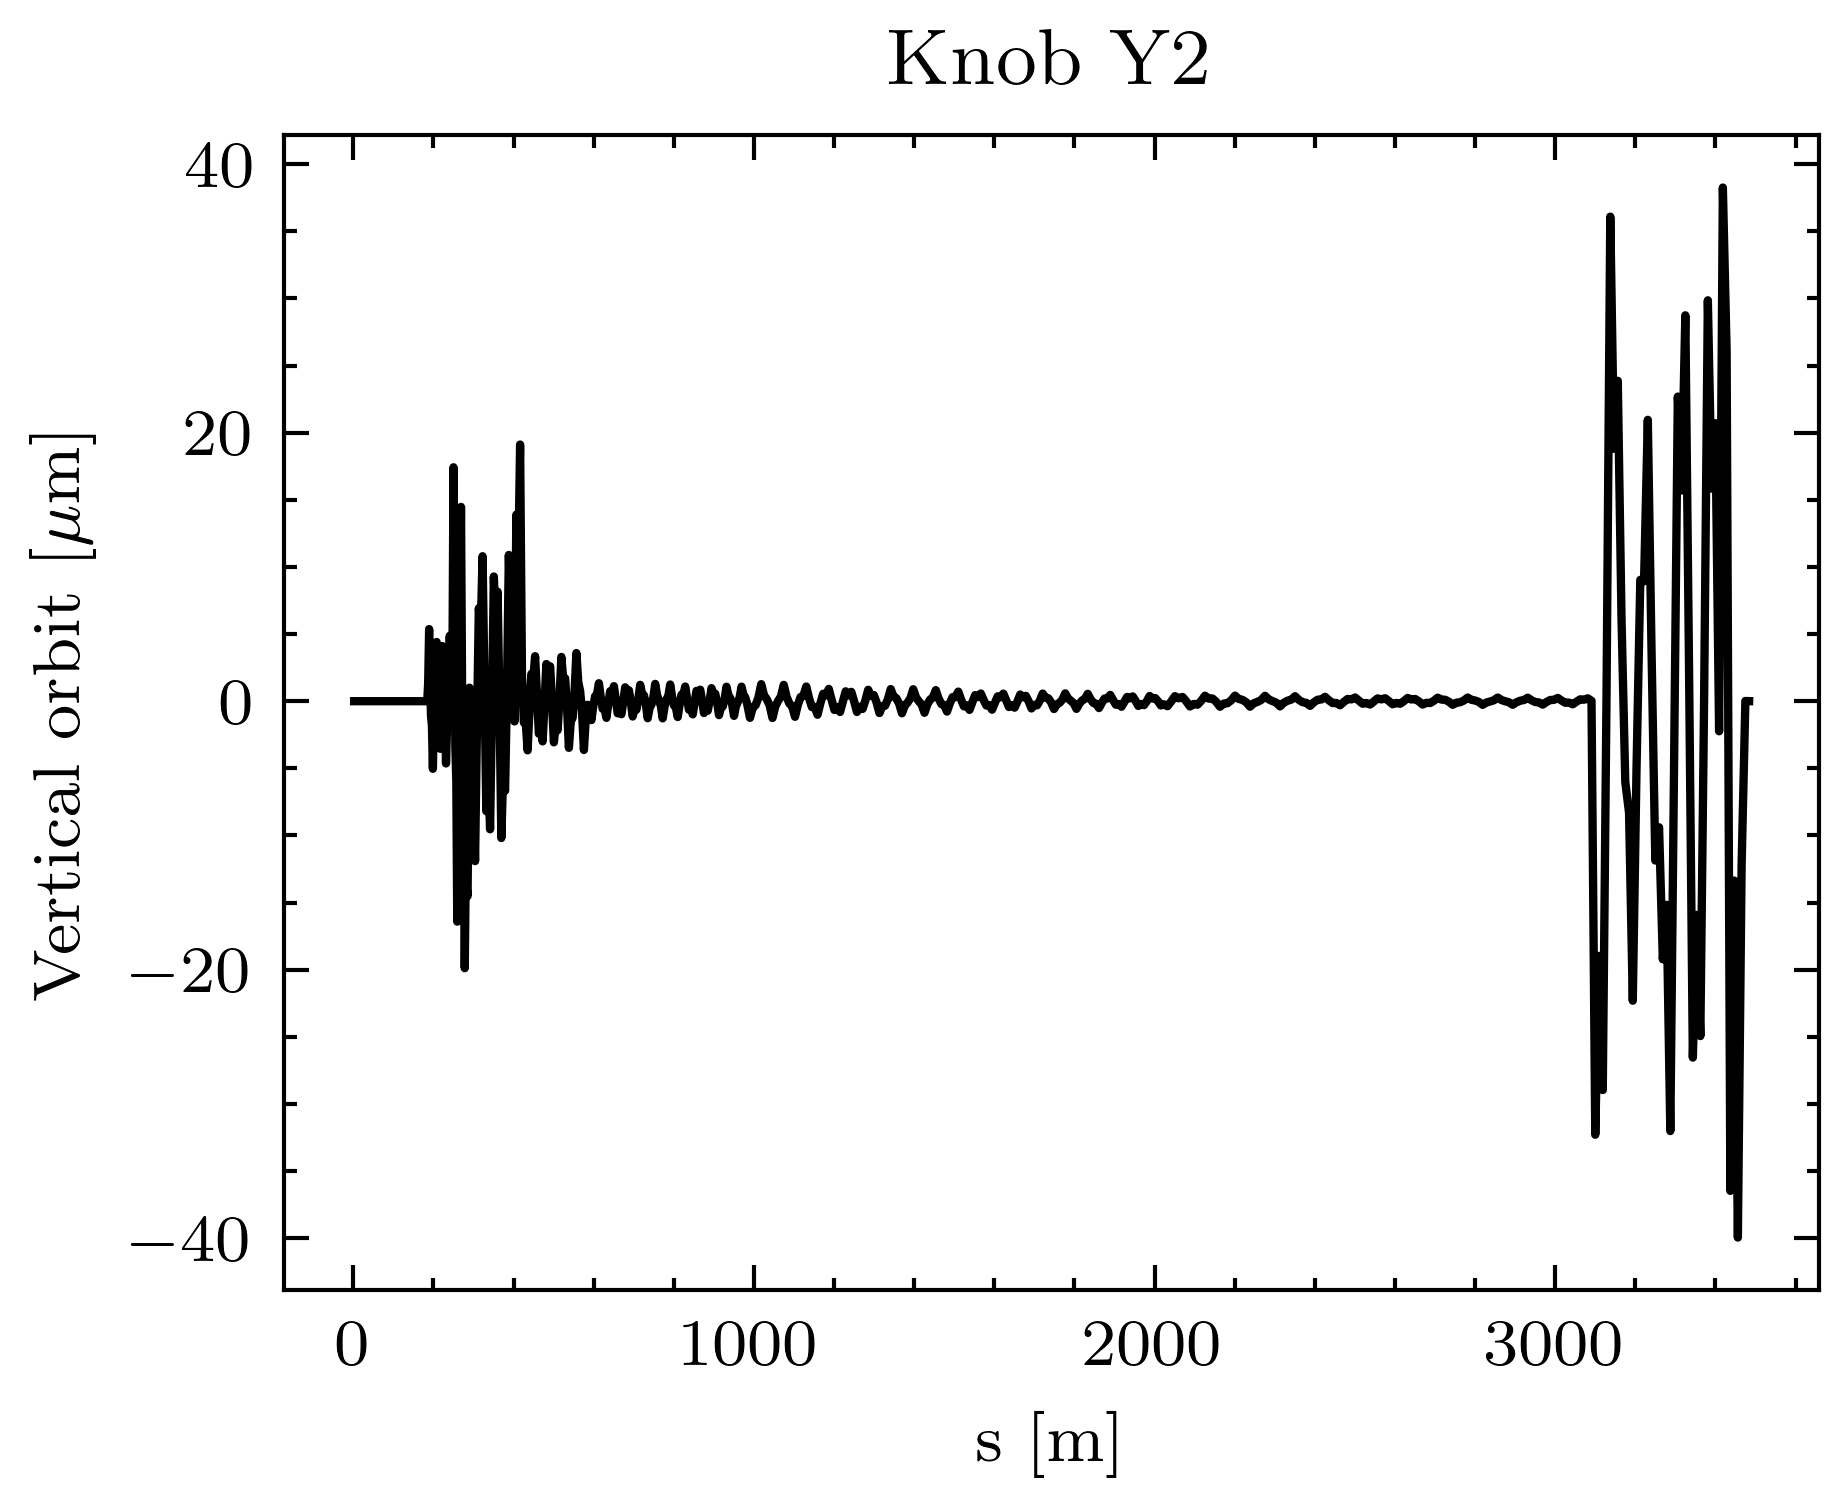

The last 2 BPMs orbit 15.794599999999999 nm and 5.58244 nm


In [25]:
knob_id = 1

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y2")
    plt.plot(beam_orbit.s, beam_orbit.y, '-', markersize = 0.5)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
#    plt.xlim(3000,)
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

print(f"The last 2 BPMs orbit {beam_orbit.y.values[-2] * 1e3} nm and {beam_orbit.y.values[-1] * 1e3} nm")